## Load Data

Preparation of data takes place in separate scripts. In the following, the aggregated data frames are read in from parquet files.

For this template script to work, the data frames must have the expected structure:

In [ ]:
# Expected data frame structure (empty example data frame)
import pandas as pd
expected_df_structure = pd.DataFrame(columns=[
    'ID', 'PARAMETER', 'RUNTIME', 'MODEL', 'SCALED', 'LIBRARY', 'ENDOGENOUS', 'EXOGENOUS', 'FIRST_FORECAST', 'ALARM_TYPE', 
    'TP', 'FN', 'FP', 'TN', 
    'FPR', 'TPR', 'FNR', 'TNR', 'ACC', 'F1S', 
    'N_CHUNKS', 'N_ITERATIONS'])

In [1]:
import pandas as pd

arimax_overview = pd.read_parquet('../data/arima-data_week15/arima-x_forecast_overview_first15000_2021-07-27T16-55-56_extended.parquet', engine='pyarrow')
rnn_overview = pd.read_parquet('../../data/RNNModel/2000_chunks/all/rnn_model_results_2000_all.parquet', engine='pyarrow')

In [ ]:
# Sort by ID, but sort alarm type low in front of high
arimax_overview['TEMPORARY_SORTING_COLUMN'] = arimax_overview.ID.replace( ['_H', '_L'], ['', ''], regex=True)
arimax_overview = arimax_overview.sort_values(by=['TEMPORARY_SORTING_COLUMN', 'ALARM_TYPE'], ascending = [True, False]).drop(['TEMPORARY_SORTING_COLUMN'], axis = 1).reset_index(drop=True)
display(arimax_overview)

In [2]:
# Sort by ID, but sort alarm type low in front of high
rnn_overview['TEMPORARY_SORTING_COLUMN'] = rnn_overview.ID.replace( ['_H', '_L'], ['', ''], regex=True)
rnn_overview = rnn_overview.sort_values(by=['TEMPORARY_SORTING_COLUMN', 'ALARM_TYPE'], ascending = [True, False]).drop(['TEMPORARY_SORTING_COLUMN'], axis = 1).reset_index(drop=True)
display(rnn_overview)

,ID,PARAMETER,RUNTIME,MODEL,SCALED,LIBRARY,ENDOGENOUS,EXOGENOUS,FIRST_FORECAST,ALARM_TYPE,...,TPR,FNR,TNR,ACC,F1S,MCC,TS,WEIGHTED_SCORE_AA,N_CHUNKS,N_ITERATIONS
0,BP_R_01_L,BP,5052,RNN,True,darts,Median,None,12,Low,...,0.1014,0.8986,0.9859,0.9589,0.1310,0.1171,0.0701,0.0314,405,4838
1,BP_R_01_H,BP,5052,RNN,True,darts,Median,None,12,High,...,0.5887,0.4113,0.9690,0.9469,0.5637,0.5360,0.3924,0.1682,405,4838
2,BP_R_02_L,BP,7487,RNN,True,darts,Min,Median,12,Low,...,0.1538,0.8462,0.9801,0.9512,0.1806,0.1587,0.0992,0.0410,405,4838
3,BP_R_02_H,BP,7487,RNN,True,darts,Max,Median,12,High,...,0.5392,0.4608,0.9732,0.9469,0.5515,0.5234,0.3807,0.1750,405,4838
4,BP_R_03_L,BP,9331,LSTM,True,darts,Median,None,12,Low,...,0.1892,0.8108,0.9614,0.9378,0.1569,0.1276,0.0851,0.0266,405,4838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,O2_R_10_H,O2,53281,LSTM,False,darts,Max,Median,12,High,...,1.0000,0.0000,0.9999,0.9999,0.9730,0.9733,0.9474,0.7826,923,25903
68,O2_R_11_L,O2,43543,GRU,False,darts,Median,None,12,Low,...,0.2141,0.7859,0.9986,0.9840,0.3323,0.3931,0.1992,0.1558,923,25903
69,O2_R_11_H,O2,43543,GRU,False,darts,Median,None,12,High,...,1.0000,0.0000,0.9998,0.9998,0.9474,0.9486,0.9000,0.6429,923,25903
70,O2_R_12_L,O2,41980,GRU,False,darts,Min,Median,12,Low,...,0.0950,0.9050,0.9981,0.9787,0.1611,0.2180,0.0876,0.0668,923,25903


In [3]:
# Results for selected parameter
selected_parameter = 'HR'
selected_overview = rnn_overview

results_selected_parameter = selected_overview[selected_overview.PARAMETER == selected_parameter][
    ['ID', 'ALARM_TYPE', 'TP', 'FN', 'FP', 'TN', 'FPR', 'TPR', 'FNR', 'TNR', 'ACC', 'F1S','TS','MCC','WEIGHTED_SCORE_AA', 'N_CHUNKS', 'N_ITERATIONS']
    ].reset_index(drop=True)

# Print best FPR & F1S - Multiple lines are displayed if there are identical scores (e.g. darts and pmdarima)
print("Best (highest) TS - Low Alarm:")
print(results_selected_parameter[results_selected_parameter.TS == results_selected_parameter[results_selected_parameter.ALARM_TYPE == 'Low'].TS.max()][['ID','TS']])
print("----------")
print("Best (highest) TS - High Alarm:")
print(results_selected_parameter[results_selected_parameter.TS == results_selected_parameter[results_selected_parameter.ALARM_TYPE == 'High'].TS.max()][['ID','TS']])
print("----------")
print("Best (highest) WEIGHTED_SCORE_AA - Low Alarm:")
print(results_selected_parameter[results_selected_parameter.WEIGHTED_SCORE_AA == results_selected_parameter[results_selected_parameter.ALARM_TYPE == 'Low'].WEIGHTED_SCORE_AA.max()][['ID','WEIGHTED_SCORE_AA']])
print("----------")
print("Best (highest) WEIGHTED_SCORE_AA - High Alarm:")
print(results_selected_parameter[results_selected_parameter.WEIGHTED_SCORE_AA == results_selected_parameter[results_selected_parameter.ALARM_TYPE == 'High'].WEIGHTED_SCORE_AA.max()][['ID','WEIGHTED_SCORE_AA']])
print("----------")
print("Best (highest) MCC - Low Alarm:")
print(results_selected_parameter[results_selected_parameter.MCC == results_selected_parameter[results_selected_parameter.ALARM_TYPE == 'Low'].MCC.max()][['ID','MCC']])
print("----------")
print("Best (highest) MCC - High Alarm:")
print(results_selected_parameter[results_selected_parameter.MCC == results_selected_parameter[results_selected_parameter.ALARM_TYPE == 'High'].MCC.max()][['ID','MCC']])
print("----------")

Best (highest) TS - Low Alarm:
           ID      TS
16  HR_R_09_L  0.3785
----------
Best (highest) TS - High Alarm:
           ID      TS
13  HR_R_07_H  0.2782
----------
Best (highest) WEIGHTED_SCORE_AA - Low Alarm:
           ID  WEIGHTED_SCORE_AA
20  HR_R_11_L             0.2339
----------
Best (highest) WEIGHTED_SCORE_AA - High Alarm:
           ID  WEIGHTED_SCORE_AA
21  HR_R_11_H             0.1636
----------
Best (highest) MCC - Low Alarm:
           ID     MCC
16  HR_R_09_L  0.5594
----------
Best (highest) MCC - High Alarm:
           ID     MCC
13  HR_R_07_H  0.4468
----------


## Model Comparison TS, Weighted Score & MCC (with arrow)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

overview = arimax_overview
# overview = arimax_overview[arimax_overview.LIBRARY == 'darts']

sns.set_style("whitegrid")

plotdata = overview.replace( ['_H', '_L'], ['', ''], regex=True)

fig, axs = plt.subplots(
    3,
    3,
    figsize = (20, 12),
    dpi = 72
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

ts_ylimits = [0,max(overview.TS)]
weighted_aa_score_ylimits = [0,max(overview.WEIGHTED_SCORE_AA)]
mcc_ylimits = [0,max(overview.MCC)]

for i, parameter in enumerate(['BP', 'HR', 'O2']):

    plot1 = sns.barplot(
        ax = axs[0,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='TS',
        hue='ALARM_TYPE',
        palette = sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[0,i].set_title(str(parameter), fontweight='bold', color= 'black', fontsize=14)
    axs[0,i].set_ylim(ts_ylimits)
    axs[0,i].tick_params(axis="x", rotation=90)
    axs[0,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_ts_low = plotdata[plotdata.TS == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].TS.max()]['TS'].unique()
    best_ts_high = plotdata[plotdata.TS == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].TS.max()]['TS'].unique()

    for bar in plot1.patches:
        if bar.get_height() == best_ts_low or bar.get_height() == best_ts_high :
            plot1.annotate("↑",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='center', size=15, xytext=(0, -10), color='white', fontsize=16,
            textcoords='offset points')

    plot2 = sns.barplot(
        ax = axs[1,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='WEIGHTED_SCORE_AA',
        hue='ALARM_TYPE',
        palette = sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[1,i].set_ylim(weighted_aa_score_ylimits)
    axs[1,i].tick_params(axis="x", rotation=90)
    axs[1,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_weighted_aa_score_low = plotdata[plotdata.WEIGHTED_SCORE_AA == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].WEIGHTED_SCORE_AA.max()]['WEIGHTED_SCORE_AA'].unique()
    best_weighted_aa_score_high = plotdata[plotdata.WEIGHTED_SCORE_AA == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].WEIGHTED_SCORE_AA.max()]['WEIGHTED_SCORE_AA'].unique()

    for bar in plot2.patches:
        if bar.get_height() == best_weighted_aa_score_low or bar.get_height() == best_weighted_aa_score_high :
            plot2.annotate("↑",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='center', size=15, xytext=(0, -10), color='white', fontsize=16,
            textcoords='offset points')

    plot3 = sns.barplot(
        ax = axs[2,i],
        data = plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='MCC',
        hue='ALARM_TYPE',
        palette = sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[2,i].set_ylim(mcc_ylimits)
    axs[2,i].tick_params(axis="x", rotation=90)
    axs[2,i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_mcc_low = plotdata[plotdata.MCC == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].MCC.max()]['MCC'].unique()
    best_mcc_high = plotdata[plotdata.MCC == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].MCC.max()]['MCC'].unique()

    for bar in plot3.patches:
        if bar.get_height() == best_mcc_low or bar.get_height() == best_mcc_high :
            plot3.annotate("↑",
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='center', size=15, xytext=(0, -10), color='white', fontsize=16,
            textcoords='offset points')  

# Save plot as PNG file
path = '../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
plt.savefig(str(path + 'evaluation_metrics_arima-x_' + timestamp + '.png'), dpi=72, bbox_inches='tight')
    
plt.show(fig)

## Model Comparison TS, Weighted Score & MCC (with red rectangle)

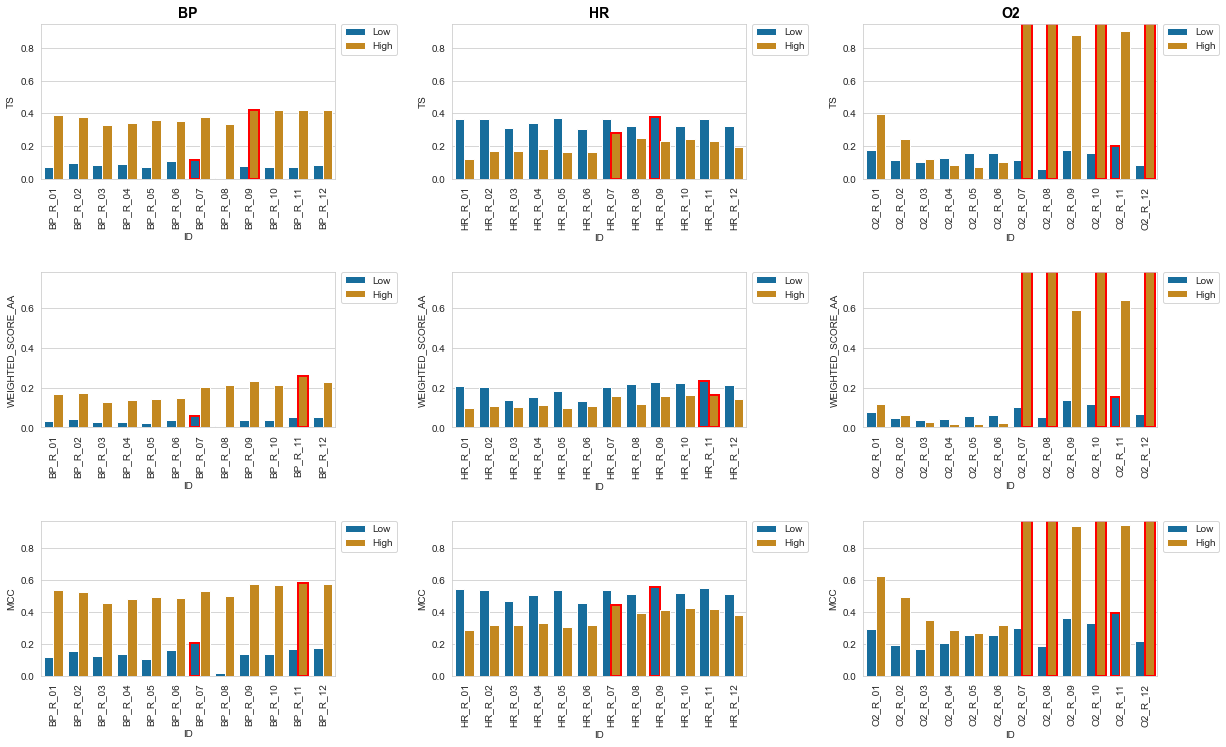

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

overview = rnn_overview

sns.set_style("whitegrid")

plotdata = overview.replace( ['_H', '_L'], ['', ''], regex=True)

fig, axs = plt.subplots(
    3,
    3,
    figsize=(20, 12),
    dpi=72
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

ts_ylimits = [0, max(overview.TS)]
weighted_aa_score_ylimits = [0, max(overview.WEIGHTED_SCORE_AA)]
mcc_ylimits = [0, max(overview.MCC)]

for i, parameter in enumerate(['BP', 'HR', 'O2']):

    plot1 = sns.barplot(
        ax=axs[0,i],
        data=plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='TS',
        hue='ALARM_TYPE',
        palette=sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[0, i].set_title(str(parameter), fontweight='bold', color='black', fontsize=14)
    axs[0, i].set_ylim(ts_ylimits)
    axs[0, i].tick_params(axis="x", rotation=90)
    axs[0, i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_ts_low = plotdata[plotdata.TS == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].TS.max()]['TS'].unique()
    best_ts_high = plotdata[plotdata.TS == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].TS.max()]['TS'].unique()

    for bar in plot1.patches:
        if bar.get_height() == best_ts_low or bar.get_height() == best_ts_high :
            bar.set_edgecolor('red')
            bar.set_linewidth(2)

    plot2 = sns.barplot(
        ax=axs[1,i],
        data=plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='WEIGHTED_SCORE_AA',
        hue='ALARM_TYPE',
        palette=sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[1, i].set_ylim(weighted_aa_score_ylimits)
    axs[1, i].tick_params(axis="x", rotation=90)
    axs[1, i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_weighted_aa_score_low = plotdata[plotdata.WEIGHTED_SCORE_AA == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].WEIGHTED_SCORE_AA.max()]['WEIGHTED_SCORE_AA'].unique()
    best_weighted_aa_score_high = plotdata[plotdata.WEIGHTED_SCORE_AA == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].WEIGHTED_SCORE_AA.max()]['WEIGHTED_SCORE_AA'].unique()

    for bar in plot2.patches:
        if bar.get_height() == best_weighted_aa_score_low or bar.get_height() == best_weighted_aa_score_high :
            bar.set_edgecolor('red')
            bar.set_linewidth(2)

    plot3 = sns.barplot(
        ax=axs[2,i],
        data=plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='MCC',
        hue='ALARM_TYPE',
        palette=sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[2, i].set_ylim(mcc_ylimits)
    axs[2, i].tick_params(axis="x", rotation=90)
    axs[2, i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_mcc_low = plotdata[plotdata.MCC == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].MCC.max()]['MCC'].unique()
    best_mcc_high = plotdata[plotdata.MCC == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].MCC.max()]['MCC'].unique()

    for bar in plot3.patches:
        if bar.get_height() == best_mcc_low or bar.get_height() == best_mcc_high :
            bar.set_edgecolor('red')
            bar.set_linewidth(2)

# Save plot as PNG file
path = '../../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
plt.savefig(str(path + 'evaluation_rnn_new_metrics' + timestamp + '.png'), dpi=72, bbox_inches='tight')

plt.show(fig)

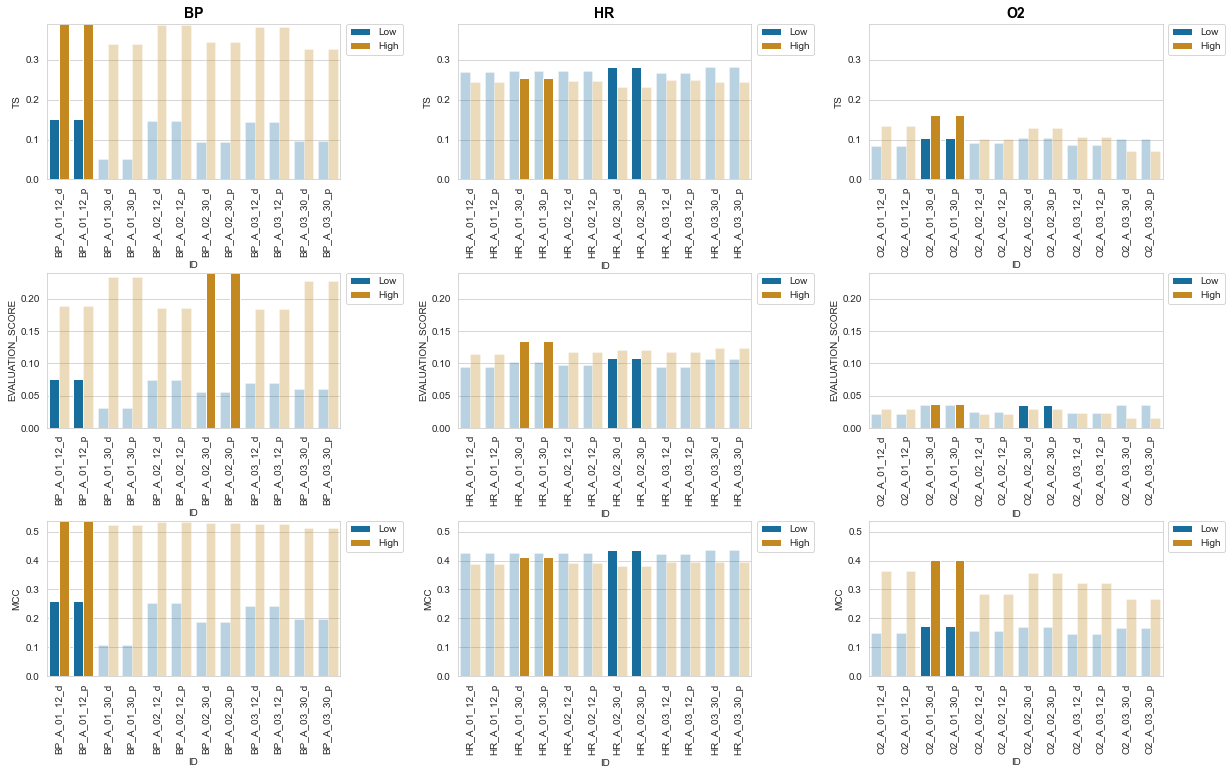

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

overview = arimax_overview

sns.set_style("whitegrid")

plotdata = overview.replace( ['_H', '_L'], ['', ''], regex=True)

fig, axs = plt.subplots(
    3,
    3,
    figsize=(20, 12),
    dpi=72
    )
fig.subplots_adjust(hspace=0.6, wspace=0.4)

ts_ylimits = [0, max(overview.TS)]
evaluation_score_ylimits = [0, max(overview.EVALUATION_SCORE)]
mcc_ylimits = [0, max(overview.MCC)]

for i, parameter in enumerate(['BP', 'HR', 'O2']):

    plot1 = sns.barplot(
        ax=axs[0,i],
        data=plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='TS',
        hue='ALARM_TYPE',
        palette=sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[0, i].set_title(str(parameter), fontweight='bold', color='black', fontsize=14)
    axs[0, i].set_ylim(ts_ylimits)
    axs[0, i].tick_params(axis="x", rotation=90)
    axs[0, i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_ts_low = plotdata[plotdata.TS == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].TS.max()]['TS'].unique()
    best_ts_high = plotdata[plotdata.TS == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].TS.max()]['TS'].unique()

    for bar in plot1.patches:
        if bar.get_height() != best_ts_low and bar.get_height() != best_ts_high :
            bar.set_alpha(0.3)

    plot2 = sns.barplot(
        ax=axs[1,i],
        data=plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='EVALUATION_SCORE',
        hue='ALARM_TYPE',
        palette=sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[1, i].set_ylim(evaluation_score_ylimits)
    axs[1, i].tick_params(axis="x", rotation=90)
    axs[1, i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_evaluation_score_low = plotdata[plotdata.EVALUATION_SCORE == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].EVALUATION_SCORE.max()]['EVALUATION_SCORE'].unique()
    best_evaluation_score_high = plotdata[plotdata.EVALUATION_SCORE == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].EVALUATION_SCORE.max()]['EVALUATION_SCORE'].unique()

    for bar in plot2.patches:
        if bar.get_height() != best_evaluation_score_low and bar.get_height() != best_evaluation_score_high :
            bar.set_alpha(0.3)

    plot3 = sns.barplot(
        ax=axs[2,i],
        data=plotdata[plotdata.PARAMETER == parameter],
        x='ID',
        y='MCC',
        hue='ALARM_TYPE',
        palette=sns.color_palette("colorblind"),
        ci=None,
        hue_order=['Low','High'])
    axs[2, i].set_ylim(mcc_ylimits)
    axs[2, i].tick_params(axis="x", rotation=90)
    axs[2, i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    best_mcc_low = plotdata[plotdata.MCC == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'Low')].MCC.max()]['MCC'].unique()
    best_mcc_high = plotdata[plotdata.MCC == plotdata[(plotdata.PARAMETER == parameter) & (plotdata.ALARM_TYPE == 'High')].MCC.max()]['MCC'].unique()

    for bar in plot3.patches:
        if bar.get_height() != best_mcc_low and bar.get_height() != best_mcc_high :
            bar.set_alpha(0.3)

# Save plot as PNG file
path = '../../plots/'
timestamp = dt.datetime.today().strftime('%Y-%m-%dT%H-%M-%S')
#plt.savefig(str(path + 'evaluation_rnn_new_metrics' + timestamp + '.png'), dpi=72, bbox_inches='tight')

plt.show(fig)